# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

In [1]:
import warnings
warnings.filterwarnings('ignore')

import scipy
from  scipy.sparse import csr_matrix
import numpy as np
from scipy.sparse import linalg

import networkx as nx
import scipy
import pandas as pd

import networkx as nx 

import matplotlib.pyplot as plt
from scipy import sparse
import numpy as np
from tqdm import tqdm
import scipy.sparse.linalg as spsplin

%matplotlib inline

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

__1.1__ 

- $vec(AXB) = (B^\top \otimes A)\, vec(X)$ if $vec(X)$ is a columnwise reshape of a matrix into a long vector (https://www.ime.unicamp.br/~cnaber/Kronecker.pdf):


Let $B = (b_1,..., b_n)$ and  $X = (x_1 ,..., x_m)$, the size of matrix $B$ is $m\times n$.

Thereofre, the $k^{th}$ column of $AXB$ is equal to:

$$(AXB)_{:,k} = A X b_k = A \sum_{i=1}^m x_i b_{ik} = A \sum_{i=1}^m b_{ik} x_i  = \begin{pmatrix} b_{1k} A& b_{2k} A & ... & b_{mk} A \end{pmatrix} \begin{pmatrix} x_1 \\ ... \\ x_m \end{pmatrix} = (b_k^T \otimes A) vec(X)$$

Now, considering all the columns:

$$vec(AXB) = \begin{pmatrix} (AXB)_{:,1} \\ \vdots \\ (AXB)_{:,n}\end{pmatrix} = \begin{pmatrix} AXb_1 \\ ... \\ AXb_n \end{pmatrix} = 
 \begin{pmatrix} b_1^T \otimes A \\ ... \\ b_n^T \otimes A\end{pmatrix} vec(X) = (B^T \otimes A) vec(X)$$
 
__q.e.d.__

- $vec(AXB)$ if $vec(X)$ is a rowwise reshape of a matrix into a long vector:

Now, let $A = \begin{pmatrix} a_1 \\ ... \\ a_n \end{pmatrix} , X = \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix}$

Analogically as in previous case:

$$(AXB)_{k,:} = a_k X B =  \sum_{i=1}^n a_{ik} x_i B =  \sum_{i=1}^n a_{ik} B^T x_i  = \begin{pmatrix} a_{1k} B^T & ... & a_{nk} B^T \end{pmatrix} \begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix} = (a_k \otimes B^T) vec(X)$$

$$vec(AXB) = \begin{pmatrix} (AXB)_{1,:} \\ \vdots \\ (AXB)_{n,:}\end{pmatrix} = \begin{pmatrix} a_1XB &  ...  a_nXB \end{pmatrix} = 
 \begin{pmatrix} a_1 \otimes B^T & ... & a_n \otimes B^T\end{pmatrix} vec(X) = (A \otimes B^T ) vec(X)$$
 
 
 __Answer:__ $vec(AXB) = (A \otimes B^T ) vec(X)$.

__1.2__ 

- The complexity of a naive computation of $(A \otimes B) x$:

Firstly, let's have a look at Kronecker product of matrices $A \in \mathbb{R}^{n \times n}$ and $B \in \mathbb{R}^{n \times n}$:
$$
A \otimes B=\left[\begin{array}{ccc}
a_{11} B & \ldots & a_{1 n} B \\
\vdots & \ddots & \vdots \\
a_{n 1} B & \ldots & a_{n n} B
\end{array}\right] \in \mathbb{R}^{n^2 \times n^2}
$$

It can be seen that the computational complexity of Kronecker product is equal to $\mathcal{O}(n^4)$.

Seconldy, the product of obtained matrix by vector $x$  has complexety $\mathcal{O}(n^2)$.

Therefore, the complexity of this procedure is equal to $\mathcal{O}(n^4)$ in naive implementation.

- It can be reduced by he use of this equation: 
$$vec(AXB) = (B^\top \otimes A)$$

Therefore, $$(A \otimes B) x = (A \otimes B) vec(X) = vec(BXA^T)$$

The computational complexitu of this procedure $vec(BXA^T)$ is equal to $\mathcal{O}(n^3)$.


__1.3__   

$A\otimes I + I \otimes B = S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1}$

Also using the property of distributivity and inverse property we can obtain:


$\Lambda = (S_A^{-1} \otimes S_B^{-1})[S_A \Lambda_A S_A^{-1} \otimes I + I \otimes S_B\Lambda_B S_B^{-1}] (S_A \otimes S_B) = $

$= S_A^{-1} S_A \Lambda_A S_A^{-1} S_A \otimes S_B^{-1} I S_B +  S_A^{-1} I S_A \otimes  S_B^{-1} S_B \Lambda_B S_B^{-1} S_B =  \Lambda_A \otimes I + I \otimes \Lambda_B =$

$=\begin{pmatrix}
\lambda_{1}^A I & 0 & 0 & \cdots & 0 \\
0 & \lambda_{2}^A I & 0 & \cdots & 0 \\
\vdots &  & \ddots &  & \vdots \\
0 & \cdots & & & \lambda_{n}^A I
\end{pmatrix} 
+
\begin{pmatrix} \Lambda_{B} & 0 & 0 & \cdots & 0 \\
0 & \Lambda_{B} & 0 & \cdots & 0 \\
\vdots &  & \ddots &  & \vdots \\
0 & \cdots & & & \Lambda_{B} 
\end{pmatrix}$ 

Where $\Lambda_{B} = 
\begin{pmatrix} \lambda_{1}^B & 0 & 0 & \cdots & 0 \\
0 & \lambda_{2}^B & 0 & \cdots & 0 \\
\vdots &  & \ddots &  & \vdots \\
0 & \cdots & & & \lambda_{m}^B 
\end{pmatrix}$

$\Lambda = diag(\lambda_1^A + \lambda_1^B, \lambda_1^A + \lambda_2^B, ..., \lambda_2^A + \lambda_1^B, ..., \lambda_n^A + \lambda_m^B)$

This matrix ($\Lambda$) contains eigenvalues of $A\otimes I + I \otimes B$ on its diagonal.

The corresponding eigenvectors are columns of $S_{A} \otimes S_{B}.$

__1.4__

- Let $x_*$ be an exact solution for the system $Ax = f$. And let $\tau$ be an iteration parameter, $x_0 = 0$, $\tau _{opt} = \frac{2}{\lambda_{\min} + \lambda_{\max}}$.

Then relative error:
$\frac{\|x_k - x_*\|_2}{\|x_*\|_2} \leq \|I - \tau A\|_2^k = \sigma^k_{max} (I - \tau A) = 
 \sigma^k_{max} \left(I - \frac{2}{\lambda_{\min} + \lambda_{\max}} A \right) 
 = \left(1 - \frac{2 \lambda_{min}}{\lambda_{\min} + \lambda_{\max}}\right)^k~(\ast)$

We also know that $\lambda_{max} = 1000$ and $\lambda_{min} = \frac{1}{1000}$.

Therefore, $(\ast) \approx \left( 1 - \frac{2}{10^6}\right)^k \leq 10^{-4}$


$k \geq \frac{-4 \lg 10}{\lg \left( 1 - \frac{2}{10^6} \right)} \approx {4,6 \cdot 10^{6}}$

__Answer:__ For Richardson iteration the number of iterations should be approximately more then ${4,6 \cdot 10^{6}}$.
 
 - Relative error for Chebyshev iteration:

$e_{k+1} \leq C q^k e_k, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1},\quad $
$q^{k} = \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1} \right)^{k} = 
  \left( \frac{\sqrt{\frac{\lambda_{max}}{\lambda_{min}}}-1}{\sqrt{\frac{\lambda_{max}}{\lambda_{min}}}+1} \right)^{k} \leq 10^{-4} $

$ \left( \frac{1000 - 1}{1000 + 1} \right)^{k} \leq 10^{-4} \Rightarrow k \geq \frac{-4 \lg 10}{\lg \frac{999}{1001}} \approx {4,6 \cdot 10^{3}}$

__Answer:__ For Chebyshev iteration the number of iterations should be approximately more then ${4,6 \cdot 10^{3}}$.
 
 - Relative error for conjugate gradient method (with the use of A-norm):
 
$\frac{\|x_k - x_* \|_A}{\| x_* \|_A} \leq 2 \Big( \frac{\sqrt{\mbox{cond}(A)} - 1}{\sqrt{\mbox{cond}(A)} + 1} \Big)^k \leq 10^{-4}$

$-4 \leq \mbox{lg}2 \Big( \frac{999}{1001} \Big)^k = \mbox{lg}2 + k \mbox{lg}\frac{999}{1001} $

$ -4 - \mbox{lg}2 \leq k \mbox{lg}\frac{999}{1001}, ~~ k \geq \frac{-4 \mbox{lg}2}{\mbox{lg}\frac{999}{1001}} $

$ k \geq 4951 $
 
However, due to the fact that all eigenvalues of $A$ are different the conjugate gradient method converges in $\hat{k}$ iterations, where $\hat{k}$ is equal to the number of different eigenvalues of matrix $A$. Therefore, as we have 1001 different eigenvalues the method converges in 1001 iterations.

($\frac{\Vert x - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})| = 1001 $)

__Answer:__ For conjugate gradient method the number of iterations should be approximately more then 1001.

__1.5__

In [3]:
n = 1001
diags = [i/1000 for i  in range(1,1001)]+[1000]
A = sparse.diags(np.array(diags))
eigvals = np.linalg.eigvalsh(A.todense())
eps = 10e-5
rhs = np.random.randn(n)
x0 = np.random.randn(n)

In [4]:
# partially taken from afterlecture 12

conv_cg = []

def cl_cg(x):
    conv_cg.append(x.copy())

x_cg, info = spsplin.cg(A, rhs, callback=cl_cg, x0=x0, tol=10e-5, maxiter=10e7)

conv_cg = [np.linalg.norm(A @ x - rhs)/np.linalg.norm(rhs) for x in conv_cg]

q = np.linalg.cond(A.todense())
conv_cg_A_norm_q = [2*((np.sqrt(q)-1)/(np.sqrt(q)+1))**i for i in range(max(len(conv_cg),4952))]

def richardson(A, b, tau, x0, tol, max_iter, only_rel_err = False):
    x = x0.copy()
    conv = []
    for i in tqdm(range(int(max_iter))):
        x = x - tau * (A @ x - b)
        if only_rel_err:
            conv.append(np.linalg.norm(A @ x - b,2)/np.linalg.norm(b,2))
        else:
            conv.append(x)
        if np.linalg.norm(A @ x - b,2)/np.linalg.norm(b,2) < tol:
            break
    return x, conv

x_rich, conv_rich = richardson(A, rhs, 2 / (min(eigvals) + max(eigvals)), x0,
                               eps, 10e6, only_rel_err = True)

niters = 10e5
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(int(niters))]
lam_max = max(eigvals)
lam_min = min(eigvals)
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r,2)/np.linalg.norm(rhs,2)]

# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

good_perm = good_shuffle([i for i in range(1, int(niters)+1)])

for i in tqdm(range(int(niters))):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    res_cheb.append(np.linalg.norm(r,2)/np.linalg.norm(rhs,2))
    
    if res_cheb[-1] < eps:
        break

  1%|▍                                                                       | 5617/1000000 [00:00<00:57, 17362.29it/s]


Text(0, 0.5, ' ||Ax_k - b||_2/||b||_2')

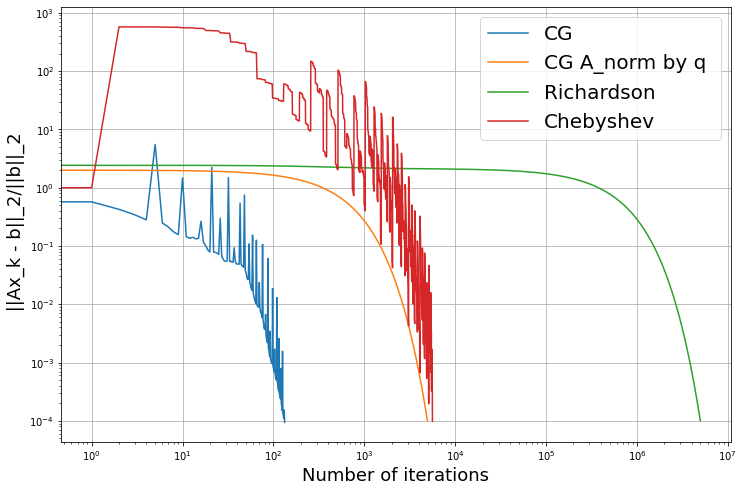

In [7]:
plt.figure(figsize=(12,8))
plt.semilogy(conv_cg, label="CG")
plt.semilogy(conv_cg_A_norm_q, label="CG A_norm by q ") #CG A_norm by q >= error (calculaed using A norm)
plt.semilogy(conv_rich, label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.xscale('log')
plt.legend(fontsize=20)
plt.grid(True)
plt.xlabel("Number of iterations", fontsize=18)
plt.ylabel(" ||Ax_k - b||_2/||b||_2", fontsize=18)

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

Let $e_0$ be an eigenvector  coresponding to eigenvalue of matrix $L$ that is equal to zero.
As matrix L is singular then the eigenvector corresponding to $\lambda=0$ ia equal to:
$$
e_0 = {(1,1...,1)^T}
$$


$p$ is initial vector, and $p_{\bot}$ is a vector of orthoprojection.

$p_{\bot}=p-(e_0,p)\frac{e_0}{\| e_0\|}$,

As a result we obtain projection  matrix $P$:
$$
P=I-\frac{e_0e_0^T}{\| e_0\|}.
$$

In [8]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)


def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    D = scipy.sparse.diags(np.array(np.sum(A, axis=0))[0])
    L = D-A
       
    e0 = np.ones(x0.shape[0])/A.shape[0]
    
    x = x0
    eigs = np.array([0])

    I = scipy.sparse.eye(A.shape[0])
    k = 0
    
    for i in range(num_iter_fix):
        if num_iter_fix == 0:
            shift = 1e-3
        x = scipy.sparse.linalg.spsolve(L-shift*I,x)
        x -= np.sum(x)*e0
        x /= np.linalg.norm(x)
        
        eig = x@L@x
        eigs = np.append(eigs,eig)
        
        if num_iter_fix == 0:
            shift = x@L@x 
            
        if np.linalg.norm(eigs[k+1]-eigs[k])/np.linalg.norm(eigs[k])<=eps:
            break
        k += 1

    for i in range(num_iter_adapt):
        x = scipy.sparse.linalg.spsolve(L-shift*I,x)
        x -= np.sum(x)*e0
        x /= np.linalg.norm(x)
      
        eig = x@L@x
        eigs = np.append(eigs,eig)

        shift=x@L@x
        
        if np.linalg.norm(eigs[k+1]-eigs[k])/np.linalg.norm(eigs[k])<=eps:
            break
        k+=1
        

    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [9]:
m, n = 5, 20
G = nx.lollipop_graph(m, n)
pos = nx.spring_layout(G)

A = nx.adjacency_matrix(G)

shift = 0.01
num_iter_fix = 10
num_iter_adapt = 20
x0 = np.random.rand(A.shape[0])
eps = 1e-12
x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)

eigs_real = np.sort(np.linalg.eigh(nx.laplacian_matrix(G).todense())[0])

print("Are the two smallest eigenvalues equal to each other:", np.allclose(eigs_real[1], eigs[-2]))

Are the two smallest eigenvalues equal to each other: True


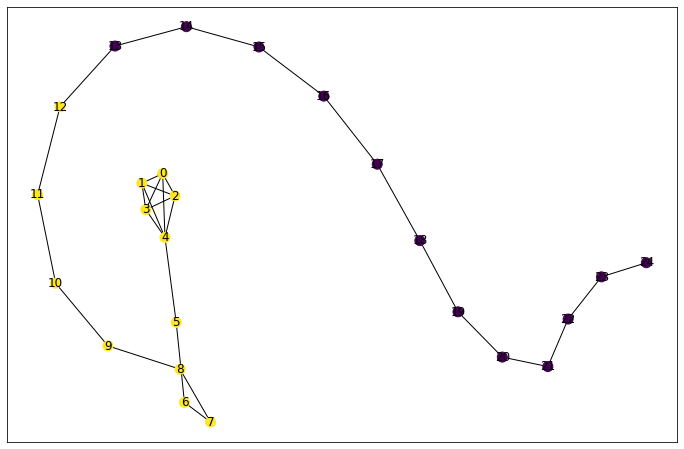

In [10]:
plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos, node_color=np.sign(x),node_size=100)

In [13]:
shift = 1e-4
num_iter_fix = 0
num_iter_adapt = 20
x0 = np.random.rand(A.shape[0])
eps = 1e-6
x, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps)

eigs_real = np.sort(np.linalg.eigh(nx.laplacian_matrix(G).todense())[0])

print("Are the two smallest eigenvalues equal to each other:", np.allclose(eigs_real[1], eigs[-2]))

Are the two smallest eigenvalues equal to each other: False


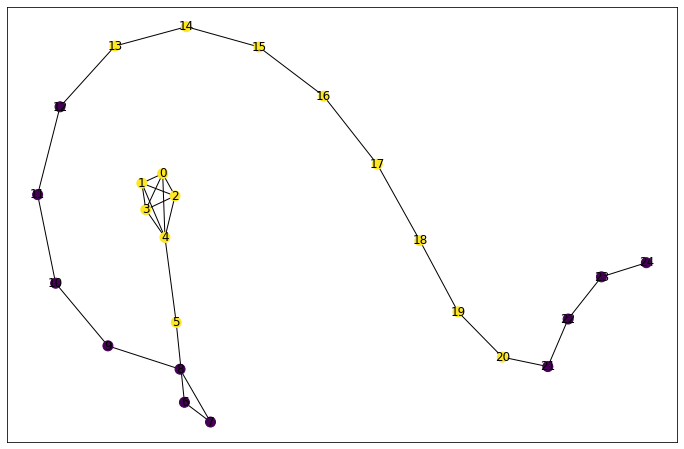

In [14]:
plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos, node_color=np.sign(x),node_size=100)

__Comment:__ If we make num_iter_fix = 0, that means that algorithm will converge to nearest to $x_0$ eigenvector and eigenvalue. To prevent it we have to use fixed shift.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

First, consider the case where Laplacian graph  is connected. Let $x$ be a nonzero vector in $ker~L(G)$. Then $0~=~(Lx, x)~ = ~\sum_{j} \sum_{i \in N(j)} (x_i - x_j)^2$. Therefore, if $i ∼ j$, then $x_i = x_j$.
As $G$ is connected, $x_1~= \dots =~ x_n$.
Hence $dim~ker~L(G)~=~1$ and the eigenvalue 0 has multiplicity 1.

Let $G_1, G_2, \dots, G_m$ be the connected components of G which consist $n_1, \dots , n_m$
vertices.

let the vertices of G be indexed so that the vertices of $G_1$ are listed first, then $G_2$, and so on. 
Then L(G) is a block-diagonal matrix of the form

$$ L(G) = \begin{pmatrix} L(G_1)  &  &\\ & \ddots &  \\ &   & L(G_n)  \end{pmatrix}$$

$$\Rightarrow  ~ker~L(G)~=~ker~L(G_1)~\otimes \dots \otimes~ker~L(G_k)$$

Finally, we can conclude $dim~ker~L(G) = \sum_{i=1}^k~dim~ker~L(G_i) = k$

Then multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

In [15]:
N = 30


C = nx.cycle_graph(N)
C_adj = nx.adjacency_matrix(C)

K = nx.complete_graph(N)
K_adj = nx.adjacency_matrix(K)

shift = 0.01
num_iter_fix = 20
num_iter_adapt = 40
x0 = np.random.rand(N)
eps = 1e-9
x_c, eigs_c = partition(C_adj, shift, num_iter_fix, num_iter_adapt, x0, eps)

x_k, eigs_k = partition(K_adj, shift, num_iter_fix, num_iter_adapt, x0, eps)

print("Alg.connectivity C_30 = %s"%round(nx.algebraic_connectivity(C),3))
print("Alg.connectivity K_30 = %s"%round(nx.algebraic_connectivity(K),3))

print(" lambda_2 C_30 =  %s"%round(eigs_c[-2],3))
print(" lambda_2 K_30 =  %s"%round(eigs_k[-2],3))


Alg.connectivity C_30 = 0.044
Alg.connectivity K_30 = 30.0
 lambda_2 C_30 =  0.044
 lambda_2 K_30 =  30.0


In [16]:
l_2_C = []
l_2_K = []

shift = 0.001
eps = 1e-9
for i in np.arange(10,100,10):
    C = nx.cycle_graph(i)
    C_adj = nx.adjacency_matrix(C)
    K = nx.complete_graph(i)
    K_adj = nx.adjacency_matrix(K)
    
    x0 = np.random.rand(i)
    _, eigs_c = partition(C_adj, shift, 10, i, x0, eps)
    _, eigs_k = partition(K_adj, shift, 10, i, x0, eps)
    
    l_2_C.append(eigs_c[-1])
    l_2_K.append(eigs_k[-1])

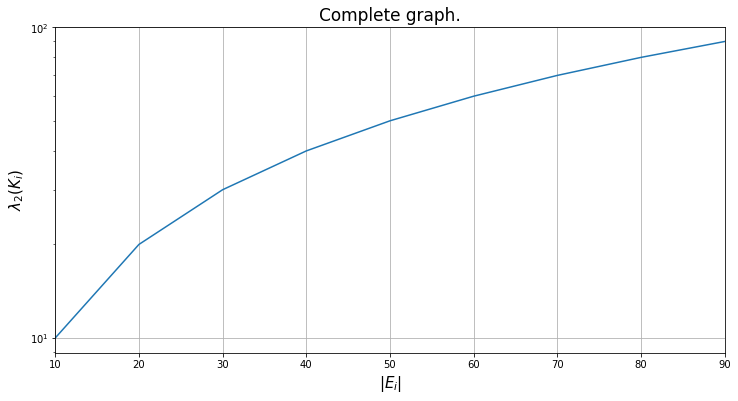

In [17]:
plt.figure(figsize=(12,6))
plt.title(r'Complete graph.', fontsize=17)
plt.ylabel(r'$\lambda_2(K_i)$', fontsize=15)
plt.xlabel(r'$|E_i|$', fontsize=15)
plt.xlim(10,90)
plt.semilogy(np.arange(10,100,10),l_2_K)
plt.grid()
plt.show()

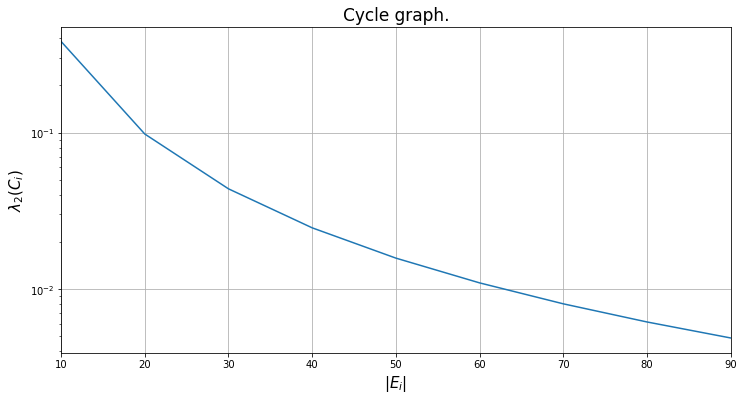

In [18]:
plt.figure(figsize=(12,6))
plt.title(r'Cycle graph.', fontsize=17)
plt.ylabel(r'$\lambda_2(C_i)$', fontsize=15)
plt.xlabel(r'$|E_i|$', fontsize=15)
plt.xlim(10,90)
plt.semilogy(np.arange(10,100,10),l_2_C)
plt.grid()

In [26]:
i = 30
C = nx.cycle_graph(i)
x0 = np.random.rand(i)
C_adj = nx.adjacency_matrix(C)
K = nx.complete_graph(i)
K_adj = nx.adjacency_matrix(K)

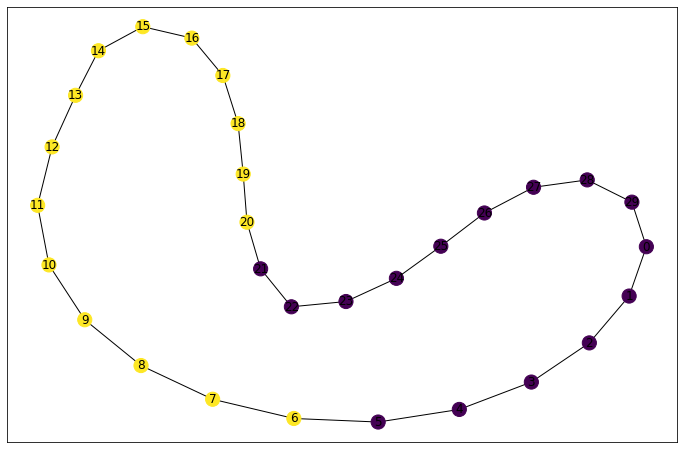

In [27]:
x0_C, eigs_c = partition(C_adj, shift, 0, i, x0, eps)

pos=nx.spring_layout(C)

plt.figure(figsize=(12,8))
nx.draw_networkx(C, pos, node_color=np.sign(x0_C),node_size=200)

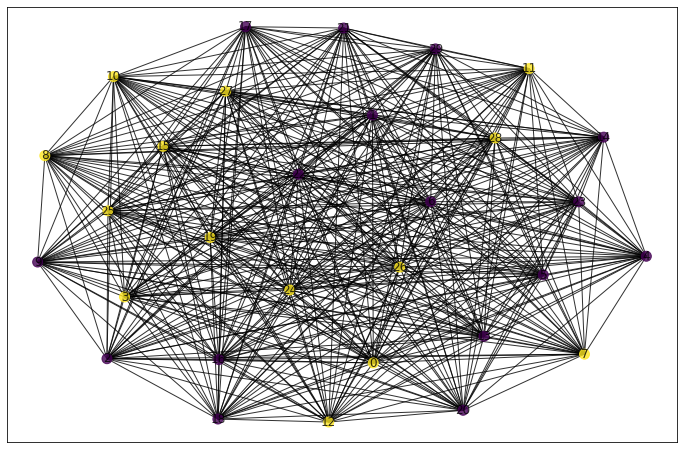

In [28]:
x0_K, eigs_k = partition(K_adj, shift, 0, i, x0, eps)

pos=nx.spring_layout(K)

plt.figure(figsize=(12,8))
nx.draw_networkx(K, pos, node_color=np.sign(x0_K),node_size=100, alpha=0.8)

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

0 255


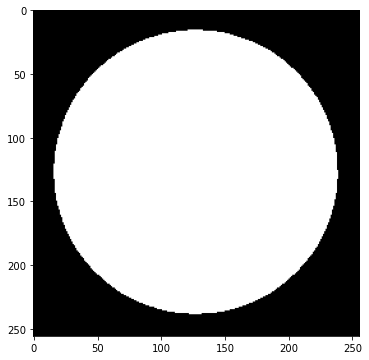

In [31]:
import cv2

img = cv2.imread('accountlogo.jpg')
img = img[..., ::-1]
print(np.min(img),np.max(img))

img = cv2.GaussianBlur(img.copy(), (9, 9), 0)

HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
LIGHT = HLS[:,:, 1]
mask = (LIGHT > 100) & (LIGHT < 250)
# mask = (LIGHT < 100) | (LIGHT > 250)
mask_int = mask.astype(np.uint8)
plt.figure(figsize=(8,6))
plt.imshow(mask_int, 'gray')
plt.show()

In [32]:
def to_graph(mask_int):
    
    G = nx.Graph()
    nodes = []
    for i, cell_i in enumerate(mask_int):
        for j, cell_j in enumerate(mask_int):
            if mask_int[i][j] == 1:
                near = [
                    [i, j+1], [i, j-1], [i+1, j], [i+1, j-1], 
                    [i+1, j+1], [i-1, j], [i-1, j-1], [i-1, j+1]
                ]

                for elem in [elem for elem in near if (elem[0]>=0 and elem[1]>=0)]:
                    if mask_int[elem[0],elem[1]] == 1:
                        node = ((elem[0], elem[1]), (i, j))
                        nodes.append(node)

    G.add_edges_from(nodes)
    
    return nx.adjacency_matrix(G)

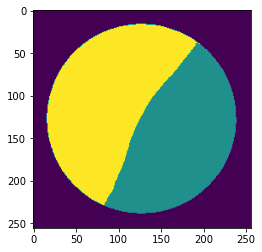

In [34]:
G = to_graph(mask_int)

shift = 1e-3
num_iter_fix = 0
num_iter_adapt = 1
x0 = np.random.rand(G.shape[0])
eps = 1e-4

nnz = np.array(np.nonzero(mask_int))
x0_C, _= partition(G, shift, num_iter_fix, num_iter_adapt, x0, eps)

colored = np.float32(mask_int).copy()

for i in range(len(x0_C)):
    if x0_C[i] > 0: 
        colored[nnz[0][i], nnz[1][i]] = 0.5

plt.imshow(colored)

## Problem 3 (25 pts)

**Disclaimer**: this problem is released first time, so some typos can be found. 

## Mathematical model (Navier-Stokes equations)

The governing equations for two-dimensional incompressible
flows can be written in a dimensionless form as:

\begin{equation}\tag{1}
\dfrac{\partial \omega}{\partial t} = \dfrac{1}{Re} \big(\dfrac{\partial^2 \omega}{\partial x^2} + \dfrac{\partial^2 \omega}{\partial y^2}\big) - \big(\dfrac{\partial \psi}{\partial y} \dfrac{\partial \omega}{\partial x} - \dfrac{\partial \psi}{\partial x} \dfrac{\partial \omega}{\partial y}\big),
\end{equation}

along with the kinematic relationship between vorticity $\omega(x,y,t)$ and stream function $\psi(x,y,t)$ according to the Poisson equation, which is given as:

\begin{equation}\tag{2}
\dfrac{\partial^2 \psi}{\partial x^2} + \dfrac{\partial^2 \psi}{\partial y^2} = -\omega.
\end{equation}

We consider equations (1) and (2) in the computational domain $\Omega = [0, 2\pi] \times [0, 2\pi]$ and impose the following periodic boundary conditions:

$$\omega(x,0,t) =\omega(x, 2\pi, t), \quad \omega(0,y,t) =\omega(2\pi, y, t), \quad t \geq 0,$$
and the same for $\psi(x,y,t)$.

Note: the Reynolds number, referred to as $Re$, is a fundamental physical constant that in particular determines whether the fluid flow is laminar or turbulent.

## The animation below represents a particular solution of the Navier-Stokes equations (1) and (2) and you will get it in the end of this problem
<img src="vorticity_N1024_Re10000.0_tau0.001.gif" />

# Fourier-Galerkin pseudospectral method

Fourier series expansion based methods are often used for solving problems with periodic boundary conditions. One of the most accurate methods for solving the Navier–Stokes equations in periodic domains is **the pseudospectral method**, which exploits the Fast Fourier Transform (FFT) algorithm. 

Outline: the main idea of spectral methods is to write the solution of a differential equation as a sum of certain "basis functions" (e.g. Fourier series, Chebyshev polynomials etc) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Comprehensive survey of such methods can be found in [this book](https://depts.washington.edu/ph506/Boyd.pdf).

### Discrete Fourier Transform

We discretize the domain $[0,L_x]\times[0, L_y]$ by introducing a computation **grid** consisting of $N_x \times N_y$ equally spaced points.

The discrete grid coordinates for $i = 0, 1, \ldots, N_x$ and $j = 0, 1, \ldots, N_y$ are given by:

$$x_i = \frac{i L_x}{N_x}, \quad y_j = \frac{j L_y}{N_y}.$$

Note, that since the domain is periodic $x_0 = x_{N_x}$ and $y_0 = y_{N_y}$.

 Then, any discrete function $u_{i,j} = u(x_i,y_j)$ can be transformed to the Fourier space using the Discrete Fourier Transform (DFT):

$$ \tilde{u}_{m,n} = \sum_{i = 0}^{N_x - 1}\sum_{j = 0}^{N_y - 1} u_{i, j}e^{-
\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

and its inverse transform is:

$$ u_{i,j} = \frac{1}{N_x N_y} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n}e^{\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

where $i$ and $j$ represent indices for the physical space (i.e. coordinates in the introduced grid), $m$ and $n$ are indices in the Fourier space (i.e. frequencies). 


We also introduce wavenumbers:

$$k_x = \frac{2\pi m}{L_x}, \quad k_y = \frac{2 \pi n}{L_y}.$$


**Bonus question:** how DFT coefficients $\tilde{u}_{m,n}$ relate to coefficients in the truncated Fourier series of $u(x,y)$?

### Differentiation
In Fourier space we can easily perform differentiation with respect to $x$ and $y$. For example, the
first and the second order derivatives of any function $u$ in discrete
domain becomes:

$$ \left(\dfrac{\partial u}{\partial x}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = \frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (\mathbf{i}k_x) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

$$ \left(\dfrac{\partial^2 u}{\partial x^2}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (-k_x^2) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

and similarly for the derivatives w.r.t. $y$ 

Assume $L_x = L_y = L = 2\pi$, $N_x = N_y = N$ for simplicity. Then, differentiation $\frac{\partial}{\partial x}$ in the Fourier space can be implemented as follows:

In [36]:
def dudx(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (1j * k1d)

 Note, we use ```np.fft.fftfreq(N)``` to determine the order of frequencies for certain ```numpy``` implementation (see the documentation of ```numpy.fft``` module for details).

Consider the following example:

In [37]:
L = 2*np.pi # size of computational domain
d = 7
N = 2**d

In [38]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid

ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# define simple periodic function
u = np.sin(xx) * np.sin(yy) 

# first, compute du/dx analytically
u_x = np.cos(xx) * np.sin(yy) 

# next, compute du/dx in Fourier space
u_tilde = np.fft.fft2(u)
u_tilde_x = dudx(u_tilde, N)
u_x_fourier = np.fft.ifft2(u_tilde_x)

# check the result
err = np.linalg.norm(u_x - u_x_fourier)
print("error = ", err)

error =  5.43739351081977e-13


- (5 pts) Similarly with the implementation of ```dudx(u_tilde, N)``` given above, your first task is to implement other derivatives arising in the Navier-Stokes equtions (1), (2). Loops are prohibited!

In [39]:
def dudy(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    dudy = u_tilde * (1j * k1d)
    return dudy.T 

def d2udx2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (- k1d**2)
 
def d2udy2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    d2udy2 = u_tilde * (- k1d**2)
    return d2udy2.T

In [40]:
# first, compute du/dy analytically
u_y = np.sin(xx) * np.cos(yy) 

# next, compute du/dy in Fourier space
u_tilde_y = dudy(u_tilde, N)
u_y_fourier = np.fft.ifft2(u_tilde_y)

# check the result
err = np.linalg.norm(u_y - u_y_fourier)
print("error = ", err)

error =  5.439058954672278e-13


In [41]:
# first, compute du2/dx2 analytically
u_xx = -np.sin(xx) * np.sin(yy) 

# next, compute du2/dx2 in Fourier space
u_tilde_xx = d2udx2(u_tilde, N)
u_xx_fourier = np.fft.ifft2(u_tilde_xx)

# check the result
err = np.linalg.norm(u_xx - u_xx_fourier)
print("error = ", err)

error =  2.689938617208372e-11


In [42]:
# first, compute du2/dy2 analytically
u_yy = -np.sin(xx) * np.sin(yy) 

# next, compute du2/dx2 in Fourier space
u_tilde_yy = d2udy2(u_tilde, N)
u_yy_fourier = np.fft.ifft2(u_tilde_yy)

# check the result
err = np.linalg.norm(u_yy - u_yy_fourier)
print("error = ", err)

error =  2.6898574799280557e-11


### Navier-Stokes equations in the Fourier space

After transforming Eq. (1) and Eq. (2) to the Fourier space, the governing equations become:

\begin{equation}\tag{3}
\frac{\partial \tilde{\omega}_{m,n}}{\partial t} = \frac{1}{Re}[(-k_x^2 - k_y^2)\tilde{\omega}_{m,n}] - \tilde{N},
\end{equation}

\begin{equation}\tag{4}
(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n},
\end{equation}

where $\tilde{N}$ represents the non-linear term which is computed using 2D convolutions as follows:

$$\tilde{N} = (\mathbf{i}k_y \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_x \tilde{\omega}_{m,n}) - (\mathbf{i}k_x \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_y \tilde{\omega}_{m,n}),$$

i.e. multiplications in physical space become convolutions in the Fourier space.

To clarify where these convolutions come from, consider two discrete functions $u$ and $v$ represented by their DFT (1D for simplicity):

$$ u_{i} = \frac{1}{N_x} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1} \tilde{u}_{m}e^{\mathbf{i}\frac{2\pi m}{L_x}x_i},$$

$$ v_{i} = \frac{1}{N_x} \sum_{n = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\tilde{v}_{n}e^{\mathbf{i}\frac{2\pi n}{L_x}x_i}.$$

Then, the direct multiplication results in:
$$ u_{i} v_{i} = \frac{1}{N_x} \sum_{k = -N_x}^{N_x - 2} \frac{1}{N_x}\tilde{w}_{k}e^{\mathbf{i}\frac{2\pi k}{L_x}x_i},$$
where the coefficients $\tilde{\omega}_k$ are computed as follows (check it!):

$$\tilde{w}_{k} = \sum_{m + n = k}\tilde{u}_m\tilde{v}_n.$$


Below we provide a possible implementation of 2D convolution using ```scipy.signal``` module. Note, that *full* convolution introduces higher frequinces that should be truncated in a proper way.

In [43]:
from scipy import signal

def conv2d_scipy(u_tilde, v_tilde, N):
    full_conv = signal.convolve(np.fft.fftshift(u_tilde),\
                              np.fft.fftshift(v_tilde), mode='full')
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)

(10 pts) Your second task is to implement the same 2D convolution but using the *Convolution Theorem* in this time.


 
 Hint:  From the lecture course you should know that applying *Convolution Theorem* is straightforward when computing **circular** (or periodic) convolutions. However, for this task you should use an appropriate zero-padding by a factor of two (with further truncation).

In [44]:
def conv2d(u_tilde, v_tilde, N):
    u_tilde = np.fft.fftshift(u_tilde)
    v_tilde = np.fft.fftshift(v_tilde)
    
    u_tilde_pad = np.pad(u_tilde,(0,N-1))
    v_tilde_pad = np.pad(v_tilde,(0,N-1)) 
    
    full_conv = np.fft.ifft2(np.fft.fft2(u_tilde_pad)*np.fft.fft2(v_tilde_pad))
    
    return np.fft.ifftshift(full_conv[N//2:-N//2+1, N//2:-N//2+1])/(N*N)

In [45]:
#Here I tried to implement two ways of calculating conv2d

def padding(u_tilde_new,padding):
    
    imagePadded = np.zeros((u_tilde_new.shape[0] + padding, u_tilde_new.shape[1] + padding))
    imagePadded[:u_tilde_new.shape[0], :u_tilde_new.shape[1]]  = u_tilde_new   
    return imagePadded

def conv2d(u_tilde, v_tilde, N, my_pad=True):
    u_tilde = np.fft.fftshift(u_tilde)
    v_tilde = np.fft.fftshift(v_tilde)
    
    if my_pad:
        u_tilde_pad = padding(u_tilde, N-1)
        v_tilde_pad = padding(v_tilde, N-1) 
    else:
        u_tilde_pad = np.pad(u_tilde,(0,N-1))
        v_tilde_pad = np.pad(v_tilde,(0,N-1))
        
    full_conv = np.fft.ifft2(np.fft.fft2(u_tilde_pad)*np.fft.fft2(v_tilde_pad))
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)

In [46]:
# check yourself

u_tilde = np.random.rand(N, N)
v_tilde = np.random.rand(N, N)

err = np.linalg.norm(conv2d(u_tilde, v_tilde, N) - conv2d_scipy(u_tilde, v_tilde, N))
print("error =", err) # should be close to machine precision

error = 6.266718417365099e-15


In [47]:
err = np.linalg.norm(conv2d(u_tilde, v_tilde, N, my_pad=False) - conv2d_scipy(u_tilde, v_tilde, N))
print("error =", err) # should be close to machine precision

error = 6.266718417365099e-15


**Poisson solver**

Finally, we need to solve the Poisson equation Eq. (2) which can be easily computed in the Fourier space according to the Eq. (4).


(5 pts) Implement inverse of the laplacian operator according to the template provided below. Note: the laplacian operator with periodic boundary conditions is singular (since the constant function is in nullspace). So, in order to avoid division by zero:
1. Assume the problem is always consistent (i.e. $\tilde{\omega}_{0,0} = 0$), 
2. Assume $\tilde{\psi}_{0,0} = 0$ (i.e. return normal solution). Loops are prohibited!

In [48]:
def laplace_inverse(omega_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    
    I = np.ones(omega_tilde.shape,dtype=np.complex128)
    k1d_x, k1d_y = np.meshgrid(k1d,k1d, indexing='xy')
    I *= -(k1d_x**2+k1d_y**2)
    
    I[0,0] = 5 # We can't put zero here as we have  divide by zero Warning 
    psi_tilde = omega_tilde / I
    psi_tilde[0,0] = 0
    
    return psi_tilde

In [49]:
# check yourself

# consider simple solution
sol_analytic = np.sin(xx)*np.sin(yy)

# compute corresponding right hand side analytically
rhs = -2*np.sin(xx)*np.sin(yy)

# solve Poisson problem in Fourier space
rhs_tilde = np.fft.fft2(rhs)
sol_tilde = laplace_inverse(rhs_tilde, N)
sol = np.fft.ifft2(sol_tilde)

# check error is small
err = np.linalg.norm(sol - sol_analytic)
print("error =", err)

error = 1.8568970136022957e-14


**Time integration**

Eqs. (3) and (4) can be considered as semi-discrete ordinary differential equations (ODEs) obtained after (spectral) spatial discretization of the partial differential equations (1) and (2):

\begin{equation}\tag{5}
\frac{d \tilde{\omega}}{dt} = \mathcal{L}(\tilde{\omega}, \tilde{\psi}),
\end{equation}

where $\mathcal{L}( \tilde{\omega} , \tilde{\psi})$ is the discrete operator of spatial derivatives including non-linear convective terms, linear diffusive terms, and $\tilde{\psi}$ which is obtained from the Poisson equation (4).

(5 pts) Implement $\mathcal{L}$ according to the template provided below

In [50]:
def L_op(omega_tilde, psi_tilde, N, Re=1):
    k1d = np.fft.fftfreq(N) * N
    
    I = np.ones(omega_tilde.shape,dtype=np.complex128)
    k1d_x, k1d_y = np.meshgrid(k1d,k1d, indexing='xy')
    
    I *= -(k1d_x**2+k1d_y**2)
    N_tilda = conv2d(1j*k1d_y*psi_tilde, 1j*k1d_x*omega_tilde, N, my_pad=False) - conv2d(1j*k1d_x*psi_tilde, 1j*k1d_y*omega_tilde, N, my_pad=False) 
    return (I*omega_tilde)/Re - N_tilda

We integrate in time using fourth-order Runge–Kutta scheme that can be written in the following form:

$$\tilde{\omega}^{(1)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{n}, \tilde{\psi}^{n})$$

$$\tilde{\omega}^{(2)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{(1)}, \tilde{\psi}^{(1)})$$

$$\tilde{\omega}^{(3)} = \tilde{\omega}^{n} + \Delta t\mathcal{L}(\tilde{\omega}^{(2)}, \tilde{\psi}^{(2)})$$

$$\tilde{\omega}^{n+1} = \frac{1}{3}(-\tilde{\omega}^{n} + \tilde{\omega}^{(1)} + 2\tilde{\omega}^{(2)} + \tilde{\omega}^{(3)}) + \frac{\Delta t}{6}\mathcal{L}(\tilde{\omega}^{3}, \tilde{\psi}^{3})$$



In [51]:
def integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re):
    omega_prev = omega0_tilde
    psi_prev = laplace_inverse(-omega_prev, N)
    for step in range(n_steps):
        if(step%100 == 0):
            print(step)
        omega_1 = omega_prev + (tau/2)*L_op(omega_prev, psi_prev, N, Re)
        psi_1 = -laplace_inverse(omega_1, N)

        omega_2 = omega_prev + (tau/2)*L_op(omega_1, psi_1, N, Re)
        psi_2 = -laplace_inverse(omega_2, N)

        omega_3 = omega_prev + tau*L_op(omega_2, psi_2, N, Re)
        psi_3 = -laplace_inverse(omega_3, N)

        omega_next = (1./3)*(-omega_prev + omega_1 + 2*omega_2 + omega_3) + (tau/6)*L_op(omega_3, psi_3, N, Re)
        psi_next = -laplace_inverse(omega_next, N)

        omega_prev = omega_next
        psi_prev = psi_next
    return omega_prev

### Validation with analytical solution

We first consider the Taylor-Green vortex (known analytical solution of the Navier-Stokes equations) to validate our solver:

In [52]:
# Taylor-Green vortex -- analytical solution for validation purposes

def taylor_green_vortex(xx, yy, t, N, Re):
    k = 3
    omega = 2*k*np.cos(k*xx)*np.cos(k*yy)*np.exp(-2*k**2*t*(1/Re))
    return omega

In [53]:
Re = 1000
tau = 1e-2 # timestep
n_steps = 100
T = tau * n_steps # finial time

omega0 = taylor_green_vortex(xx, yy, 0, N, Re) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


In [54]:
# check the error is small

omegaT_analytical = taylor_green_vortex(xx, yy, T, N, Re) 
err = np.linalg.norm(omegaT_analytical - omegaT)
print("error =", err)

error = 2.3036913166348604e-12


### Shear layer problem

Finaly, we consider another (more interesting) initial vorticity that gives the dynamic from the GIF in the beginning of this problem.

In [55]:
# intial condition that evolves like a vortex

def shear_layer0(xx, yy, N):
    delta = 0.05
    sigma = 15/np.pi
    a = delta*np.cos(yy[:, :N//2]) - sigma*(np.cosh(sigma*(xx[:, :N//2] - np.pi/2)))**(-2)
    b = delta*np.cos(yy[:, N//2:]) + sigma*(np.cosh(sigma*(3*np.pi/2 - xx[:, N//2:])))**(-2)
    return np.concatenate((a, b), axis=1)

In [56]:
Re = 1000
tau = 1e-3 # timestep
n_steps = 10000
T = tau * n_steps # finial time

omega0 = shear_layer0(xx, yy, N) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


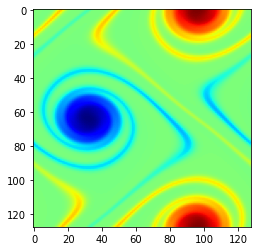

In [57]:
# plot the solution at the final timestamp

plt.imshow(omegaT, cmap='jet')